<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW2**


For this HW we’ll use data released by the Stanford Open Policing Project (SOPP) for the state of North Carolina, available hereLinks to an external site.. It contains records of 9.6 million police stops in the state between 2000 and 2015. A related paper is here: https://5harad.com/papers/traffic-stops.pdf

Throughout this problem, report any data cleaning steps (such as dropping some rows) that you took. Also report any ambiguities you encountered and how you resolved them.

## **Data Loading and Random Sampling**

Since the dataset being loaded is very large, we are going to randomly sample 1,000,000 rows from the dataset for our analysis. This might lead to results that do not align with the overall trend seen in the wider data, but this is just a function of the data being sampled.

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.utils.random import sample_without_replacement

data = pd.read_csv("NC-clean.csv.gz", compression='gzip')
data.head(10)

<ipython-input-1-d5d94a324136>:6: DtypeWarning: Columns (3,5,7,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NC-clean.csv.gz", compression='gzip')


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,search_basis,officer_id,drugs_related_stop,ethnicity,district
0,NC-2000-000001,NC,2000-01-01,00:01,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,Search Incident to Arrest,Incident to Arrest,False,Arrest,True,NaN,NaN,NaN,N,NaN
1,NC-2000-000002,NC,2000-01-01,00:01,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
2,NC-2000-000003,NC,2000-01-01,00:01,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
3,NC-2000-000004,NC,2000-01-01,00:02,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,NaN,NaN,N,NaN
4,NC-2000-000005,NC,2000-01-01,00:02,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,No Action,False,NaN,NaN,NaN,N,NaN
5,NC-2000-000006,NC,2000-01-01,00:02,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,Consent,Consent,False,Citation,False,Observation Suspected Contraband,NaN,NaN,N,NaN
6,NC-2000-000007,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,F,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
7,NC-2000-000008,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Written Warning,False,NaN,NaN,NaN,N,NaN
8,NC-2000-000009,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Citation,False,NaN,NaN,NaN,N,NaN
9,NC-2000-000010,NC,2000-01-01,00:05,NaN,NaN,NaN,Unknown,NC State Highway Patrol,M,...,NaN,NaN,False,Citation,False,NaN,NaN,NaN,N,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9558084 entries, 0 to 9558083
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   stop_date              object 
 3   stop_time              object 
 4   location_raw           object 
 5   county_name            object 
 6   county_fips            float64
 7   fine_grained_location  object 
 8   police_department      object 
 9   driver_gender          object 
 10  driver_age_raw         float64
 11  driver_age             float64
 12  driver_race_raw        object 
 13  driver_race            object 
 14  violation_raw          object 
 15  violation              object 
 16  search_conducted       bool   
 17  search_type_raw        object 
 18  search_type            object 
 19  contraband_found       bool   
 20  stop_outcome           object 
 21  is_arrested            bool   
 22  search_basis      

In [3]:
resampled_data = data.sample(n=1000000, random_state=42)
resampled_data.head(5)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,search_basis,officer_id,drugs_related_stop,ethnicity,district
2071087,NC-2004-071406,NC,2004-03-03,NaN,E4,Forsyth County,37067.0,WINSTON SALEM,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,10607,NaN,N,E4
3990192,NC-2008-195265,NC,2008-04-10,NaN,B2,Sampson County,37163.0,NaN,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,10303,NaN,N,B2
5050121,NC-2009-580025,NC,2009-11-19,NaN,F2,NaN,NaN,NaN,NC State Highway Patrol,M,...,NaN,NaN,False,Citation,False,NaN,21323,NaN,N,F2
4458735,NC-2008-663808,NC,2008-12-24,NaN,D6,Randolph County,37151.0,asheboro,NC State Highway Patrol,F,...,NaN,NaN,False,Citation,False,NaN,10654,NaN,N,D6
8040542,NC-2013-472450,NC,2013-08-24,NaN,Durham,Durham County,37063.0,NaN,NC State Highway Patrol,M,...,NaN,NaN,False,Written Warning,False,NaN,21549,NaN,H,C7


In [4]:
resampled_data = resampled_data.reset_index()
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   index                  1000000 non-null  int64  
 1   id                     1000000 non-null  object 
 2   state                  1000000 non-null  object 
 3   stop_date              1000000 non-null  object 
 4   stop_time              36599 non-null    object 
 5   location_raw           964571 non-null   object 
 6   county_name            517024 non-null   object 
 7   county_fips            517024 non-null   float64
 8   fine_grained_location  98130 non-null    object 
 9   police_department      1000000 non-null  object 
 10  driver_gender          1000000 non-null  object 
 11  driver_age_raw         1000000 non-null  float64
 12  driver_age             999760 non-null   float64
 13  driver_race_raw        1000000 non-null  object 
 14  driver_race        

## **Stop rates**
### **Part A**

Using the SOPP dataset.  For each possible group defined by race, age, gender where:
race is one of “Asian”, “Black”, “Hispanic”, “White”
age is one of the buckets 15–19, 20–29, 30–39, 40–49, and 50+.
gender is one of “female”, “male”
   - Report the percentage of the Arrested (`is_arrested`) per each category, where percentage is calculated based on the total number of samples from that category. For example if 10 Asian drivers are arrested and there are 100 Asian drivers in the SOPP dataset, the percentage would be 10%.

In [5]:
resampled_data.driver_race.value_counts()

White       661444
Black       236489
Hispanic     68604
Other        25674
Asian         7789
Name: driver_race, dtype: int64

In [6]:
total_drivers_race = resampled_data.driver_race.value_counts()
total_arrested_drivers_race = resampled_data.loc[resampled_data.is_arrested == True].driver_race.value_counts()

driver_race_percentage = total_arrested_drivers_race/total_drivers_race
driver_race_percentage

White       0.011112
Black       0.016060
Hispanic    0.029299
Other       0.014723
Asian       0.007446
Name: driver_race, dtype: float64

In [7]:
driver_race_percentage.index

Index(['White', 'Black', 'Hispanic', 'Other', 'Asian'], dtype='object')

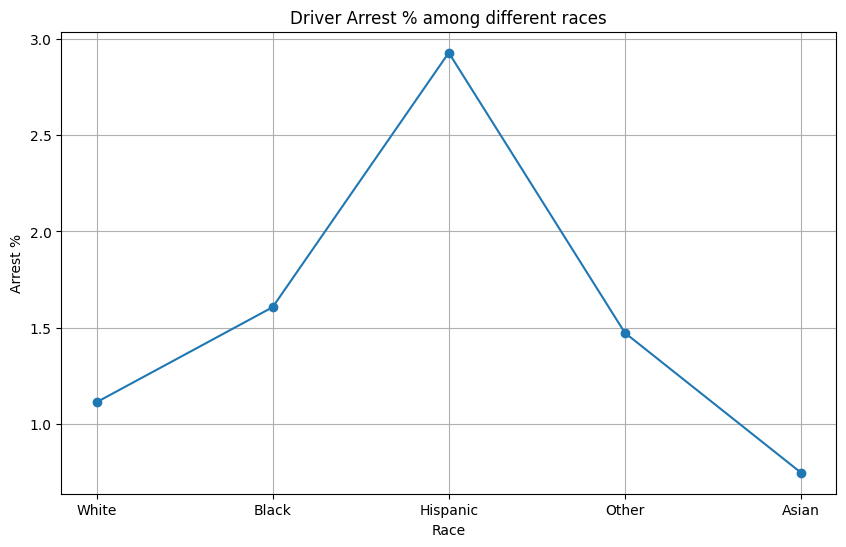

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
labels = driver_race_percentage.index

plt.plot(labels, driver_race_percentage * 100, marker='o')

plt.title('Driver Arrest % among different races')
plt.xlabel('Race')
plt.ylabel('Arrest %')

plt.grid(True)
plt.show()

In [10]:
resampled_data.driver_age.value_counts()

21.0    36121
20.0    35712
22.0    35541
19.0    34177
23.0    33870
        ...  
95.0        9
99.0        7
96.0        5
97.0        5
98.0        3
Name: driver_age, Length: 85, dtype: int64

In [11]:
# Define the boundaries of your age buckets
bins = [0, 15, 20, 30, 40, 50, 120]

# Create labels for your age buckets
labels = ['<15', '15-19', '20-29', '30-39', '40-49', '50+']

# Create a new column 'age_bucket' in df
resampled_data['driver_age_bucket'] = pd.cut(resampled_data['driver_age'], bins=bins, labels=labels, include_lowest=True, right=False)
resampled_data.head(5)

,index,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,...,search_type,contraband_found,stop_outcome,is_arrested,search_basis,officer_id,drugs_related_stop,ethnicity,district,driver_age_bucket
0,2071087,NC-2004-071406,NC,2004-03-03,NaN,E4,Forsyth County,37067.0,WINSTON SALEM,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,10607,NaN,N,E4,30-39
1,3990192,NC-2008-195265,NC,2008-04-10,NaN,B2,Sampson County,37163.0,NaN,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,10303,NaN,N,B2,15-19
2,5050121,NC-2009-580025,NC,2009-11-19,NaN,F2,NaN,NaN,NaN,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,21323,NaN,N,F2,30-39
3,4458735,NC-2008-663808,NC,2008-12-24,NaN,D6,Randolph County,37151.0,asheboro,NC State Highway Patrol,...,NaN,False,Citation,False,NaN,10654,NaN,N,D6,30-39
4,8040542,NC-2013-472450,NC,2013-08-24,NaN,Durham,Durham County,37063.0,NaN,NC State Highway Patrol,...,NaN,False,Written Warning,False,NaN,21549,NaN,H,C7,20-29


In [12]:
total_drivers_age = resampled_data.driver_age_bucket.value_counts()
total_arrested_drivers_age = resampled_data.loc[resampled_data.is_arrested == True].driver_age_bucket.value_counts()

driver_age_percentage = total_arrested_drivers_age/total_drivers_age
driver_age_percentage

20-29    0.016656
30-39    0.015241
40-49    0.013533
50+      0.008239
15-19    0.009071
<15           NaN
Name: driver_age_bucket, dtype: float64

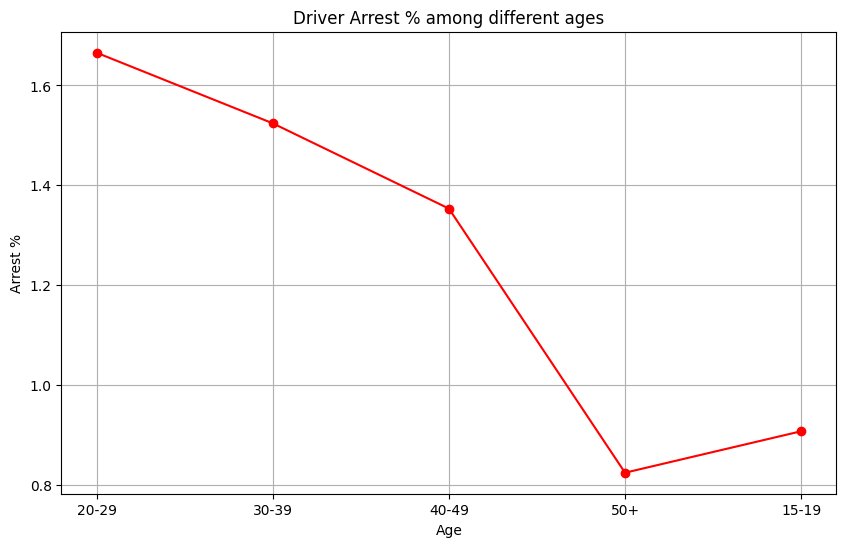

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
labels = driver_age_percentage.index

plt.plot(labels, driver_age_percentage * 100, marker='o', color='red')

plt.title('Driver Arrest % among different ages')
plt.xlabel('Age')
plt.ylabel('Arrest %')

plt.grid(True)
plt.show()

In [14]:
resampled_data.driver_gender.value_counts()

M    669475
F    330525
Name: driver_gender, dtype: int64

In [15]:
total_drivers_gender = resampled_data.driver_gender.value_counts()
total_arrested_drivers_gender = resampled_data.loc[resampled_data.is_arrested == True].driver_gender.value_counts()

driver_gender_percentage = total_arrested_drivers_gender/total_drivers_gender
driver_gender_percentage

M    0.016776
F    0.007149
Name: driver_gender, dtype: float64

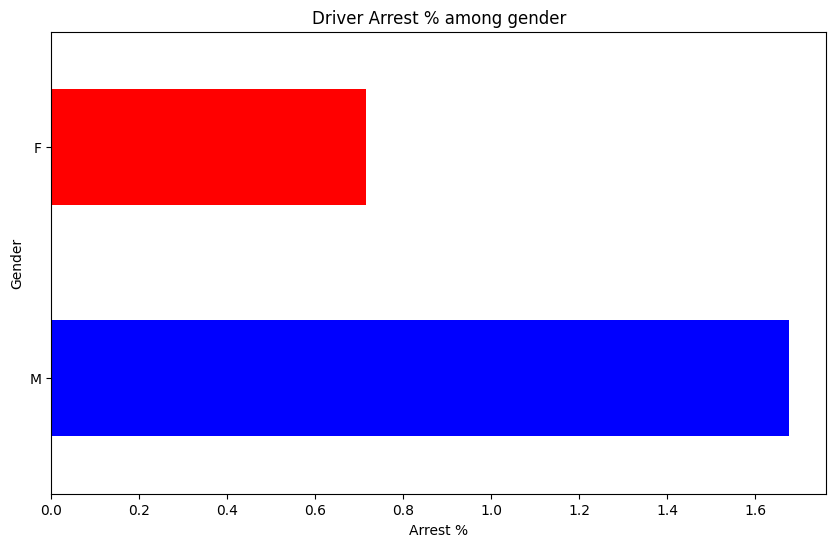

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
labels = driver_gender_percentage.index

# plt.plot(labels, driver_gender_percentage * 100, marker='o', color='green')


(driver_gender_percentage * 100).plot.barh(color=['blue', 'red'])

plt.title('Driver Arrest % among gender')
plt.ylabel('Gender')
plt.xlabel('Arrest %')

plt.show()

<br><br><br>



### **Part B**

For each variable age, gender and race, describe(in words) what type of technique you think will be a better choice to transform the data from categorical value to numerical.

There are several encoding techniques for converting categorical data to numerical. We'll discuss how each of the variables can be converted:

1. **Race:** The data in the `driver_race` column is one of 'White', 'Black', 'Hispanic', 'Other', or 'Asian'. Since this data is nominal i.e. categorical data with no natural priority or ordering, one-hot encoding would be a good choice. With one-hot encoding, a new column will be created for each category, set to 1 if the original value was infact that category or 0.

2. **Age:** Here for age we are considering the buckets created above, the values contained here are '<15', '15-19', '20-29', '30-39', '40-49' and '50+'. This data can be considered as ordinal i.e. having a natural ordering, and hence ordinal encoding would be the best fit here. A unique integer value will be assigned to each value based on the order, <15 = 0, 15-19 = 1 and so on.

3. **Gender:** Since this only contains 2 values 'M' and 'F', a simple label encoder can be used here i.e., assigning both category a value of 0 or 1. One-hot encoding could also work here as the data is nominal.


<br><br><br>

Part C:

- use logistic regression model to estimate the
  - probability of a search (`search_conducted`)
  - probability of arrest (`is_arrested`),
  - probability of a citation (`stop_outcome == "Citation"`)

- For each of the three outcomes, report the coefficients of race, age, and gender along with mean squared errors. Feel free to sample the data for performance reasons, but if you do, make sure that all standard errors are < 0.1.